In [0]:
import tensorflow as tf
from tensorflow.keras.applications import inception_v3
import numpy as np
import matplotlib.pyplot as plt

In [1]:
 pip install tensorflow==2.0.0-rc0 

     |████████████████████████████████| 86.3MB 1.3MB/s 
     |████████████████████████████████| 501kB 48.0MB/s 
     |████████████████████████████████| 4.3MB 29.2MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras.applications import inception_v3
import numpy as np
import matplotlib.pyplot as plt

In [0]:
pretrained_model = inception_v3.InceptionV3(
    input_shape = (299, 299, 3),
    include_top= True,
    weights= 'imagenet')

96116736/96112376 [==============================] - 3s 0us/step


In [0]:
pretrained_model.trainable = False

In [0]:
last_output = pretrained_model.layers[-2].output

In [0]:
from tensorflow.keras import Model

x = tf.keras.layers.Flatten()(last_output)

model = Model(inputs = pretrained_model.input, outputs = last_output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import cv2


def detect_faces(image):
  # Create a face detector
  face_detector = dlib.cnn_face_detection_model_v1('/content/mmod_human_face_detector.dat')

  # Run detector and get bounding boxes of the faces on image.
  detected_faces = face_detector(image, 1)
  face_frames = [(x.rect.left(), x.rect.top(),
                    x.rect.right(), x.rect.bottom()) for x in detected_faces]

  return face_frames
  
  
  
def crop_with_face_frame(image):
  # Detect faces
  detected_faces = detect_faces(image)
  face = None
  # Crop faces and plot
  for n, face_rect in enumerate(detected_faces):
    face = np.array(Image.fromarray(image).crop(face_rect))
  return face



def process_image(image_path):
  # Load image
  image = io.imread(image_path)
  
  # Crop face out of image
  image = crop_with_face_frame(image)
  
  # Resize image for the CNN
  image = cv2.resize(image, (300, 300), interpolation = cv2.INTER_AREA)
  
  # Add another axis to image 
  image = np.array(image[np.newaxis, :, :, :] /255, dtype = np.float32)
  
  return image
    
dlib.cnn_face_detection_model_v1()

In [9]:
img = process_image('/content/danielle.png')
io.imshow(img.squeeze())

RuntimeError: ignored

In [0]:
def compare_images(image_path1, image_path2):
  
  image_1 = process_image(image_path1)
  image_2 = process_image(image_path2)
  
  comp1 = model(image_1)
  comp2 = model(image_2)
  
  distance = np.linalg.norm(comp1 - comp2)
  
  return distance

In [0]:
from google.colab import files
#for i in range(4):
upload = files.upload()

Saving IMG_8523.jpg to IMG_8523.jpg


In [0]:
image_path1 = '/content/my_image.jpg'
image_path2 = '/content/sobhan_chatterjee_pp_photo.jpg'
image_path3 = '/content/my_image_1.jpg'
image_path4 = '/content/Neeraj_pp_photo.jpg'

In [0]:
plt.figure(1)
plt.imshow(io.imread(image_path1))
plt.figure(2)
plt.imshow(io.imread(image_path2))
plt.figure(3)
plt.imshow(io.imread(image_path3))
plt.figure(4)
plt.imshow(io.imread(image_path4))

In [0]:
distance = compare_images(image_path1, image_path2)
print(distance)
distance = compare_images(image_path1, image_path3)
print(distance)
distance = compare_images(image_path1, image_path4)
print(distance)
distance = compare_images(image_path3, image_path4)
print(distance)
distance = compare_images(image_path2, image_path4)
print(distance)

11.820741
11.450921
12.009748
11.20654
9.19343


In [0]:
img = model(image_1)

In [0]:
img.shape

TensorShape([1, 131072])

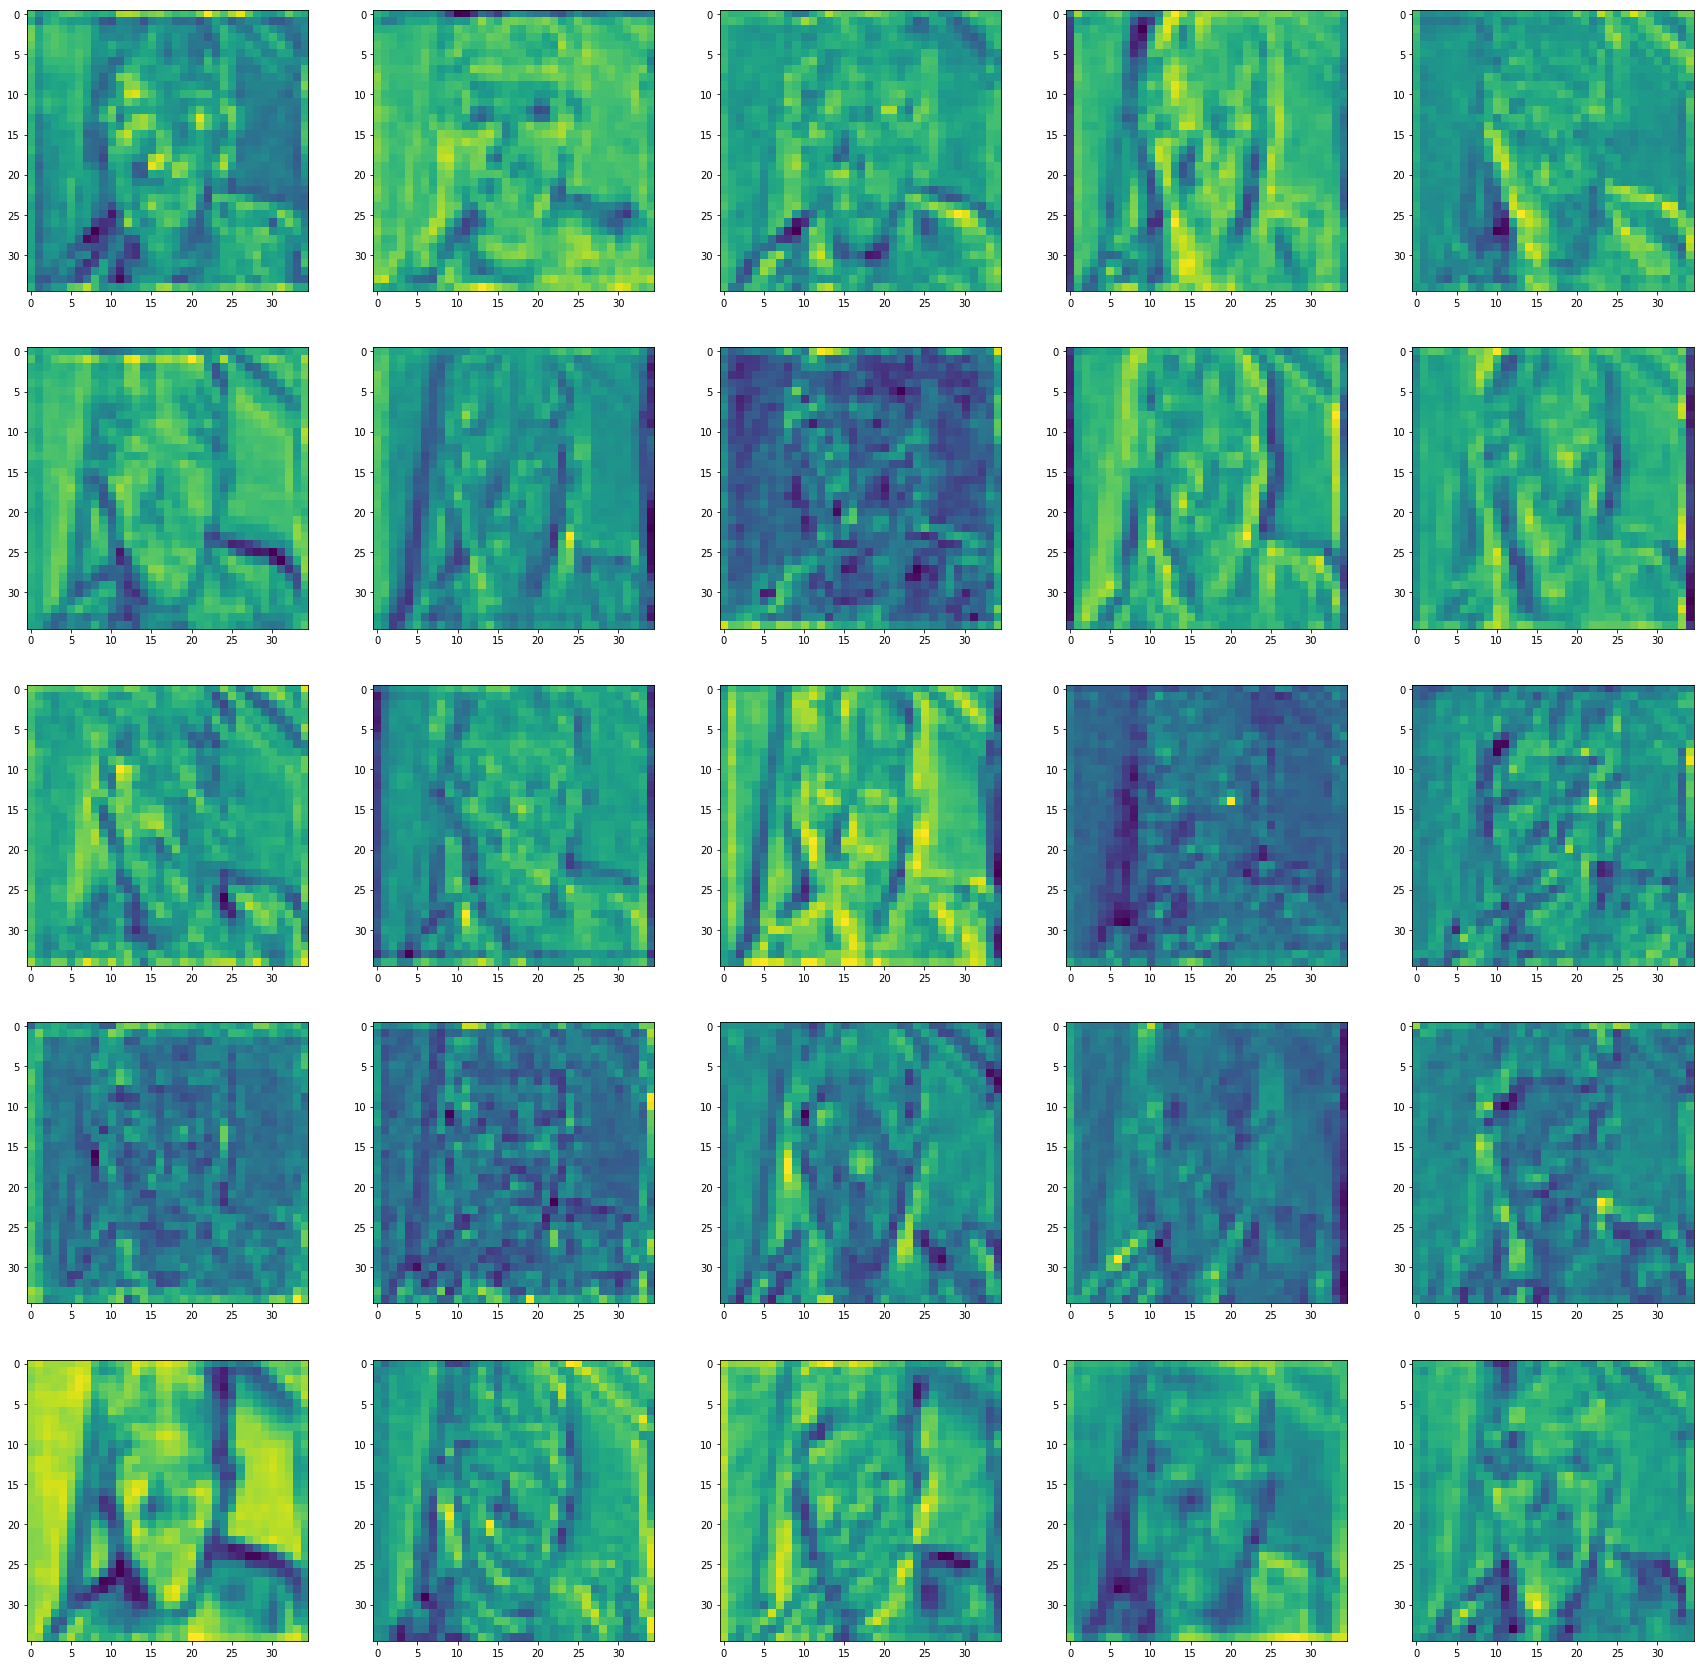

In [0]:
plt.figure(figsize = (30, 30))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(img.numpy()[0,:,:,i])